In [ ]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# lstsq

## Implementation

In [ ]:
A = np.array([[ 2, 0],
              [-1, 1],
              [ 0 , 2]])
b = np.array([[ 1],
              [ 0],
              [-1]])
x = np.random.rand(1,2)
x_ = np.array([[ 1/3],
               [-1/3]])

In [ ]:
print(f"arbitary residual: {np.linalg.norm(np.dot(A,x.T)-b)}")
print(f"residual: {np.linalg.norm(np.dot(A,x_)-b)}")

arbitary residual: 1.2280132460718594
residual: 0.816496580927726


In [ ]:
## Gram-Schmidt
def GR_algorithm(A):
    Q = np.zeros_like(A)
    Q[0,:] = A[0,:]/np.linalg.norm(A[0,:])
    for i in range(1, A.shape[1]):
        Q[i,:] = A[i,:]

        for j in range(0, i):
            Q[i,:] -= Q[j,:]*np.dot(Q[j,:], A[i,:])    
        
        ## linearly dependence
        if Q[i,:] == np.zeros(A.shape[0]):
            print("it has linearly dependent columns")
            break

        Q[i,:] = Q[i,:] / np.linalg.norm(Q[i,:])
    return Q

In [ ]:
GR_algorithm(A)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


array([[1, 0],
       [0, 1],
       [0, 0]])

In [ ]:
## QR factorization
def QR_factorization(A,Q,R):
    norm_of_q = np.linalg.norm(A[:,0])
    Q[:,0] = A[:,0] / norm_of_q
    R[0,0] = norm_of_q

    ## columns
    for i in range(1, A.shape[1]):
        Q[:,i] = A[:,i]
        
        ## rows
        for j in range(i):
            R[j,i] = np.dot(Q[:,j],A[:,i])
            Q[:,i] = Q[:,i] - R[j,i]*Q[:,j]
        norm_of_q = np.linalg.norm(Q[:,i])
        R[i,i] = norm_of_q

        ## linearly dependence
        if norm_of_q == 0:
            print("it has linearly dependent columns")
            break

        Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])
    return Q, R

In [ ]:
Q = np.zeros_like(A, dtype=np.float64)
R = np.zeros((A.shape[1],A.shape[1]), dtype=np.float64)
Q, R = QR_factorization(A, Q, R)

In [ ]:
def lstsq(A,Q,R,b):
    
    Q, R = QR_factorization(A,Q,R)
    x_hat = np.linalg.inv(R) @ Q.T @ b

    return x_hat

In [ ]:
Q

array([[ 0.89442719,  0.18257419],
       [-0.4472136 ,  0.36514837],
       [ 0.        ,  0.91287093]])

In [ ]:
R

array([[ 2.23606798, -0.4472136 ],
       [ 0.        ,  2.19089023]])

### note<br>

$\hat{x} = A^{\dagger}b = R^{-1}Q^Tb$

In [ ]:
A = np.random.rand(100,10)
Q = np.zeros_like(A)
R = np.zeros((A.shape[1],A.shape[1]))
%timeit QR_factorization(A, Q, R)

1000 loops, best of 5: 452 µs per loop


In [ ]:
b = np.random.rand(A.shape[0])
x_hat = lstsq(A, Q, R, b)
print(f"residual: {np.linalg.norm(np.dot(A,x_hat)-b)}")

residual: 2.7815551849382363


In [ ]:
theta = np.linalg.lstsq(A,b,rcond=None)[0]
print(f"residual: {np.linalg.norm(np.dot(A,theta)-b)}")

residual: 2.781555184938236


so... probably np.linalg.lstsq use $A^{\dagger}$ as the solution be $A^{\dagger}b$...

## Testing

In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

In [ ]:
t = np.zeros(10)

In [ ]:
start = timer()
print("OK")
end = timer()
print(timedelta(seconds=end-start))
t[0] = end-start

OK
0:00:00.001503


In [ ]:
def get_operation_time(data_size=3):
    time_by_data_size = np.zeros((2,data_size))
    # data_size is logarithm, base 10, of real data size
    for i in range(data_size):
        ## set data
        m = 10**(i+1)
        n = 10**i
        A = np.random.rand(m,n)
        Q = np.zeros((m,n))
        R = np.zeros((n,n))
        b = np.random.rand(m)

        ## get solution x_hat
        ## 1. by np.linalg.lstsq
        start_lstsq = timer()
        theta = np.linalg.lstsq(A,b, rcond=None)[0]
        end_lstsq = timer()

        ## 2. by QR factorization
        start_QR = timer()
        Q, R = QR_factorization(A, Q, R)
        x_hat = np.linalg.inv(R) @ Q.T @ b
        end_QR = timer()

        ## record results
        time_by_data_size[0,i] = end_lstsq - start_lstsq
        time_by_data_size[1,i] = end_QR - start_QR

    return time_by_data_size

In [ ]:
result = get_operation_time()

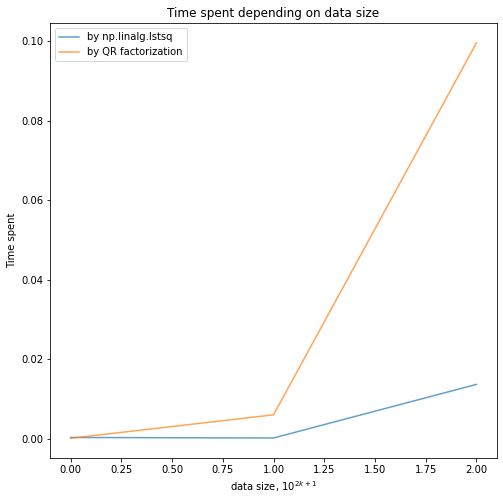

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(result[0,:], alpha = 0.7, label="by np.linalg.lstsq")
plt.plot(result[1,:], alpha = 0.7, label="by QR factorization")
plt.title("Time spent depending on data size")
plt.xlabel("data size, $10^{2k+1}$")
plt.ylabel("Time spent")
plt.legend()

plt.show()